In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *
from time import *

In [2]:
data = pd.read_csv(r'./charge_hourly_with_Covid.csv')

In [3]:
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,1.21,30.0,1.00,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,1.21,30.0,1.00,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,1.21,30.0,1.00,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.00,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...,...,...
10211,2022-01-31 20:00:00,0.000000,0,20,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10212,2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10213,2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10214,2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000


In [4]:
df = data.drop(['Time', 'hols'], axis=1)
df

,Energy_kWh,weekday,hour,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,4.214567,2,9,False,1.21,30.0,1.00,NaN,NaN,NaN
1,0.560625,2,10,False,1.21,30.0,1.00,4.214567,NaN,NaN
2,0.000000,2,11,False,1.21,30.0,1.00,0.560625,4.214567,NaN
3,0.000000,2,12,False,1.21,30.0,1.00,0.000000,0.560625,4.214567
4,0.000558,2,13,False,1.21,30.0,1.00,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...
10211,0.000000,0,20,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10212,0.000000,0,21,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10213,0.000000,0,22,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10214,0.000000,0,23,False,0.96,20.0,0.25,0.000000,0.000000,0.000000


In [5]:
# Change the measure column to turn it into categorical data
df.loc[:, 'measure'] = df['measure']*4
df.loc[:, 'measure'] = df['measure'].astype(int)

In [6]:
df.drop(['E_1','E_2','E_3'], axis=1, inplace=True)
#df.drop(['measure'], axis=1, inplace=True)
df = df.iloc[3:,:]

In [7]:
df

,Energy_kWh,weekday,hour,is_hol,R,IC_number,measure
3,0.000000,2,12,False,1.21,30.0,4
4,0.000558,2,13,False,1.21,30.0,4
5,0.000000,2,14,False,1.21,30.0,4
6,0.000000,2,15,False,1.21,30.0,4
7,0.000000,2,16,False,1.21,30.0,4
...,...,...,...,...,...,...,...
10211,0.000000,0,20,False,0.96,20.0,1
10212,0.000000,0,21,False,0.96,20.0,1
10213,0.000000,0,22,False,0.96,20.0,1
10214,0.000000,0,23,False,0.96,20.0,1


In [8]:
df.isna().sum()

Energy_kWh    0
weekday       0
hour          0
is_hol        0
R             0
IC_number     0
measure       0
dtype: int64

In [9]:
#from sklearn.model_selection import train_test_split 
#train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

In [10]:
cont_df,cat_df = cont_cat_split(df, max_card = 25, dep_var = 'Energy_kWh')

In [11]:
cat_df

['weekday', 'hour', 'is_hol', 'measure']

In [12]:
cont_df

['R', 'IC_number']

In [13]:
procs_nn = [Categorify, Normalize]
splits = RandomSplitter(0.2)(range_of(df))
to_nn = TabularPandas(df, procs_nn, cat_df, cont_df, splits=splits, y_names='Energy_kWh')

In [14]:
dls = to_nn.dataloaders(150)

In [15]:
from fastai.tabular.all import*

In [16]:
learn = tabular_learner(dls, wd=0.02, y_range=(0, 36), layers=[1000,500], n_out=1, loss_func=F.mse_loss, metrics=rmse)

SuggestedLRs(valley=0.0030199517495930195)

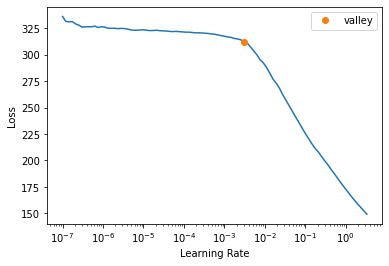

In [17]:
learn.lr_find()

In [18]:
learn.fine_tune(30, 2e-3)

epoch,train_loss,valid_loss,_rmse,time
0,172.613342,84.647461,9.200405,00:00


epoch,train_loss,valid_loss,_rmse,time
0,67.674774,53.320049,7.302058,00:00
1,60.468842,49.580357,7.041332,00:00
2,52.575588,36.060154,6.005011,00:00
3,41.572216,46.026730,6.784300,00:00
4,27.058395,9.359064,3.059259,00:00
5,13.306544,6.380678,2.526000,00:00
6,8.565389,5.625669,2.371850,00:00
7,6.792510,5.342610,2.311409,00:00
8,6.088894,6.219830,2.493959,00:00
9,5.811777,6.824291,2.612334,00:00


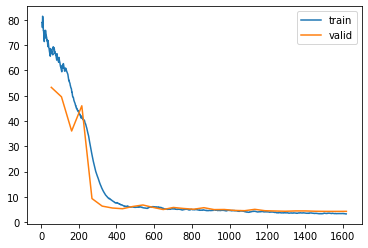

In [19]:
learn.recorder.plot_loss()

In [20]:
preds,targs = learn.get_preds()

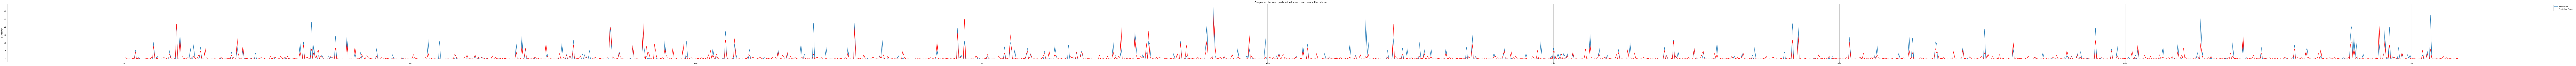

In [21]:
plt.figure(figsize=(260,6))
plt.plot(range(len(targs)), targs)
plt.plot(range(len(preds)), preds, 'r')
plt.title('Comparison between predicted values and real ones in the valid set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

In [23]:
torch.save(learn, "models/FNN_singlepoint.pth")

In [24]:
class PermutationImportance():
  """Calculate and plot the permutation importance"""
  def __init__(self, learn:Learner, df=None, bs=None):
    """Initialize with a test dataframe, a learner, and a metric"""
    self.learn = learn
    self.df = df
    bs = bs if bs is not None else learn.dls.bs
    if self.df is not None:
      self.dl = learn.dls.test_dl(self.df, bs=bs)
    else:
      self.dl = learn.dls[1]
    self.x_names = learn.dls.x_names.filter(lambda x: '_na' not in x)
    self.na = learn.dls.x_names.filter(lambda x: '_na' in x)
    self.y = dls.y_names
    self.results = self.calc_feat_importance()
    self.plot_importance(self.ord_dic_to_df(self.results))

  def measure_col(self, name:str):
    """Measures change after column shuffle"""
    col = [name]
    if f'{name}_na' in self.na: col.append(name)
    orig = self.dl.items[col].values
    perm = np.random.permutation(len(orig))
    self.dl.items[col] = self.dl.items[col].values[perm]
    metric = learn.validate(dl=self.dl)[1]
    self.dl.items[col] = orig
    return metric

  def calc_feat_importance(self):
    """Calculates permutation importance by shuffling a column on a percentage scale"""
    print('Getting base error')
    base_error = self.learn.validate(dl=self.dl)[1]
    self.importance = {}
    pbar = progress_bar(self.x_names)
    print('Calculating Permutation Importance')
    for col in pbar:
      self.importance[col] = self.measure_col(col)
    for key, value in self.importance.items():
      self.importance[key] = (base_error-value)/base_error #this can be adjusted
    return OrderedDict(sorted(self.importance.items(), key=lambda kv: kv[1], reverse=True))

  def ord_dic_to_df(self, dict:OrderedDict):
    return pd.DataFrame([[k, v] for k, v in dict.items()], columns=['feature', 'importance'])

  def plot_importance(self, df:pd.DataFrame, limit=20, asc=False, **kwargs):
    """Plot importance with an optional limit to how many variables shown"""
    df_copy = df.copy()
    df_copy['feature'] = df_copy['feature'].str.slice(0,25)
    df_copy = df_copy.sort_values(by='importance', ascending=asc)[:limit].sort_values(by='importance', ascending=not(asc))
    ax = df_copy.plot.barh(x='feature', y='importance', sort_columns=True, **kwargs)
    for p in ax.patches:
      ax.annotate(f'{p.get_width():.4f}', ((p.get_width() * 1.005), p.get_y()  * 1.005))

In [25]:
learn.eval()

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(8, 5)
    (1): Embedding(25, 10)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=24, out_features=1000, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=1000, out_features=500, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=500, out_features=1, bias=True)
    )
    (3): SigmoidRange(low=0, high=36)
  )
)

Getting base error


Calculating Permutation Importance


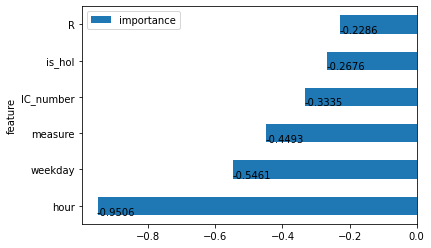

In [26]:
res = PermutationImportance(learn, df, bs=150)

# Test set

In [27]:
data_test = pd.read_csv(r'./charge0322_hourly_with_Covid.csv')

In [28]:
df_test = data_test.drop(['Time', 'hols'], axis=1)

In [29]:
# Change the measure column to turn it into categorical data
df_test.loc[:, 'measure'] = df_test['measure']*4
df_test.loc[:, 'measure'] = df_test['measure'].astype(int)

#df_test.loc[:, 'measure'] = 0

df_test.drop(['E_1','E_2','E_3'], axis=1, inplace=True)
#df_test.drop(['E_1'], axis=1, inplace=True)
#df_test.drop(['E_3'], axis=1, inplace=True)
df_test

,Energy_kWh,weekday,hour,is_hol,R,IC_number,measure
0,20.445542,1,8,False,0.930,15.0,1
1,13.989892,1,9,False,0.930,15.0,1
2,6.558958,1,10,False,0.930,15.0,1
3,11.839467,1,11,False,0.930,15.0,1
4,7.112458,1,12,False,0.930,15.0,1
...,...,...,...,...,...,...,...
660,0.000000,0,20,True,1.265,10.0,1
661,0.000000,0,21,True,1.265,10.0,1
662,0.000000,0,22,True,1.265,10.0,1
663,0.000000,0,23,True,1.265,10.0,1


In [30]:
cont_df_test,cat_df_test = cont_cat_split(df_test, max_card = 25, dep_var = 'Energy_kWh')

In [31]:
cat_df_test

['weekday', 'hour', 'is_hol', 'measure']

In [32]:
procs_nn = [Categorify, Normalize]
to_test = TabularPandas(df_test, procs_nn, cat_df_test, cont_df_test, y_names='Energy_kWh')

In [33]:
dls_test = to_test.dataloaders()

In [34]:
preds,targs = learn.get_preds(dl=dls_test[0])

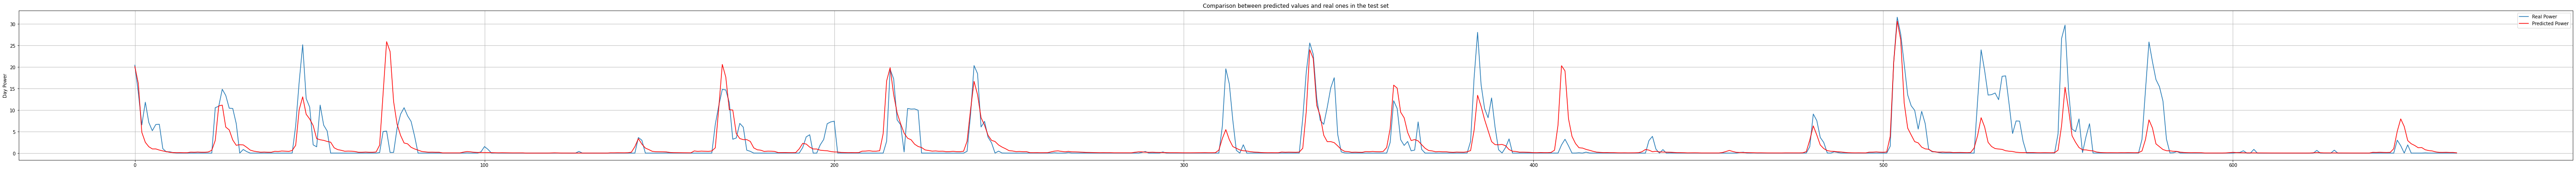

In [35]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs)
plt.plot(range(len(preds)), preds, 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()